In [8]:
import os
import pandas as pd
import sys
import warnings
working_dir = os.getcwd()
if working_dir.endswith("drivenData/pumpitup/notebooks"):
    os.chdir("../")
print(os.getcwd())
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import make_dataset

/Users/karun/Desktop/drivenData/pumpitup


In [9]:
training_data = make_dataset.merge("../data/raw/trainingdata.csv","../data/raw/traininglabels.csv",for_eda = True)

In [10]:
training_data.shape

(59400, 41)

In [11]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', 50):
    display(training_data.head())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [12]:
training_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [13]:
cols_to_drop = ['date_recorded','wpt_name','recorded_by']

Check to see what is lowest level of factor in the location hierarchy (basin, subvillage, region, district etc.)


In [14]:
region_features = ['basin','subvillage','region', 'region_code', 'district_code','lga','ward']
region_df = training_data[region_features].drop_duplicates()
region_df

,basin,subvillage,region,region_code,district_code,lga,ward
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
5,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa
6,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye
7,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo
8,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia
9,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho


In [15]:
import random 
def determine_lowest_granularity(subset):
    if not (isinstance(region_df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    cols = subset.columns
    cols =[col for col in cols if subset[col].isna().sum() == 0] #remove columns with NA
    df_shape = subset.shape
    store = {}
    max_val = 0
    for col in cols:
        unique_cols = subset[col].unique()
        len_unique_vals = len(unique_cols)
        store[col] = len(unique_cols)
        if max_val <= len_unique_vals:
            max_val = len_unique_vals
            key = col
        
    return key,store    

In [16]:
lowest_granularity, store = determine_lowest_granularity(region_df)
print(lowest_granularity)

ward


As we now established that `ward` has the lowest granularity(among the non-na features), we can safely ignore the rest of the location features without loss of information.

In [17]:
cols_to_drop = cols_to_drop + [col for col in region_features if col!=lowest_granularity]
print(cols_to_drop)

['date_recorded', 'wpt_name', 'recorded_by', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga']


In [18]:
def get_na_columns(df,threshold):
    threshold_level = df.shape[0]*threshold
    return [c for c in df.columns if df[c].isna().sum() > threshold_level]
cols_to_drop = cols_to_drop + get_na_columns(training_data, 0.00)#Remove all NA columns for now

In [19]:
print(cols_to_drop)

['date_recorded', 'wpt_name', 'recorded_by', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


Let's go through each remaining feature one by one.

In [20]:
remaining_cols = [col for col in training_data.columns if col not in cols_to_drop]
print(remaining_cols)

['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'ward', 'population', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


In [21]:
t_df = training_data[remaining_cols]

#custom describe function
def describe_df(df):
    '''
        This will list out each column in the dataset with a brief summary of it's attributes.
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    df_cols = df.columns
    out_cols = ['name','type','first_five','last_five','unique_values','total_values','na_values']
    out_df = pd.DataFrame(columns = out_cols)
    for col in df_cols:
        out_dict = {}
        out_dict['name'] = col
        out_dict['type'] = df[col].dtype
        out_dict['first_five'] = list(df[col].head())
        out_dict['last_five']  = list(df[col].tail())
        out_dict['unique_values'] = len(df[col].unique())
        out_dict['total_values'] = len(df[col])
        out_dict['na_values'] = (df[col].isna().sum())
        out_df = out_df.append(out_dict, ignore_index =True)
    return out_df

In [22]:
class ValidationError(Exception):
    def __init__(self, message, errors):

        # Call the base class constructor with the parameters it needs
        super(ValidationError, self).__init__(message)
        print(errors)
def get_contingency_table(df):
    '''
        Used for visualising relationships between two categorical variables
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    col_df = df.columns
    if (len(col_df) > 2):
        raise ValidationError("Dataframe must have only two columns.",col_df)
    return pd.crosstab(index = df[col_df[0]], columns = df[col_df[1]])
def get_color_map(target_variable):
    if target_variable == 'functional':
        return 'green'
    elif target_variable == 'non functional':
        return 'red'
    elif target_variable == 'funtional needs repair':
        return 'yellow'
def get_box_plot(df, target_column_index = 1):
    '''
        Used for visualising relationships between a continous variable (independent) and a categorical variable (dependent)
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    col_df = df.columns
    if (len(col_df) > 2):
        raise ValidationError("Dataframe must have only two columns.",col_df)
    if target_column_index == 1:
        x_index,y_index = 1,0
    elif target_column_index == 0:
        x_index,y_index = 0,1
    else:
        raise ValidationError("target_column_index must be set to 0 or 1.",target_column_index)
    sns.boxplot(x=df.columns[x_index], y=df.columns[y_index], data=t_df)
    plt.show()

Feature Name:  id
Feature Type:  int64
Sample Data:  [69572, 8776, 34310, 67743, 19728] ...... [60739, 27263, 37057, 31282, 26348]


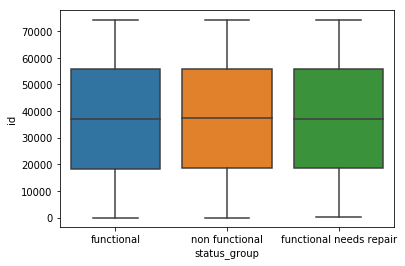

Feature Name:  amount_tsh
Feature Type:  float64
Sample Data:  [6000.0, 0.0, 25.0, 0.0, 0.0] ...... [10.0, 4700.0, 0.0, 0.0, 0.0]


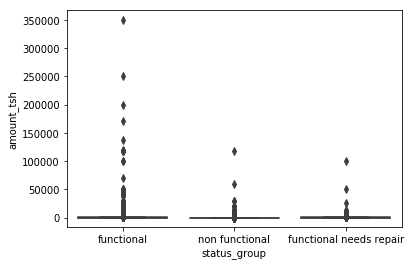

Feature Name:  gps_height
Feature Type:  int64
Sample Data:  [1390, 1399, 686, 263, 0] ...... [1210, 1212, 0, 0, 191]


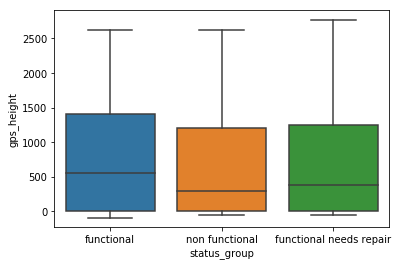

Feature Name:  longitude
Feature Type:  float64
Sample Data:  [34.93809275, 34.6987661, 37.46066446, 38.48616088, 31.13084671] ...... [37.16980689, 35.24999126, 34.01708706, 35.86131531, 38.10404822]


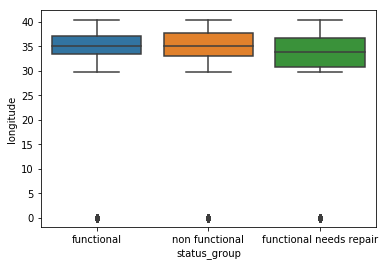

Feature Name:  latitude
Feature Type:  float64
Sample Data:  [-9.85632177, -2.14746569, -3.82132853, -11.15529772, -1.82535885] ...... [-3.25384746, -9.0706288, -8.75043433, -6.37857327, -6.74746425]


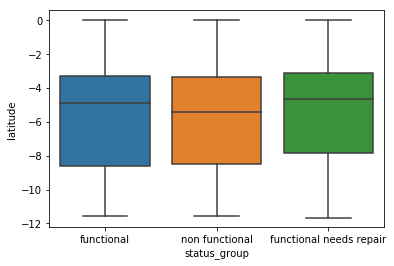

Feature Name:  num_private
Feature Type:  int64
Sample Data:  [0, 0, 0, 0, 0] ...... [0, 0, 0, 0, 0]


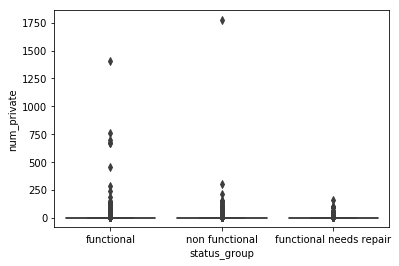

Feature Name:  ward
Feature Type:  object
Sample Data:  ['Mundindi', 'Natta', 'Ngorika', 'Nanyumbu', 'Nyakasimbi'] ...... ['Masama Magharibi', 'Ikondo', 'Chimala', 'Mvumi Makulu', 'Ngerengere']
status_group      functional  functional needs repair  non functional
ward                                                                 
Aghondi                    0                        0              12
Akheri                    27                        7              11
Arash                      7                        0               5
Arri                      14                        0               5
Arusha Chini              30                        0              27
Babayu                     5                        0               5
Badi                      16                        1              17
Badugu                     6                        0              11
Bahi                       8                        0               9
Balangidalalu              8        

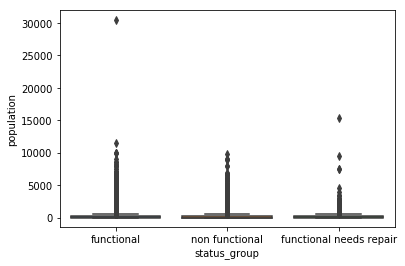

Feature Name:  construction_year
Feature Type:  int64
Sample Data:  [1999, 2010, 2009, 1986, 0] ...... [1999, 1996, 0, 0, 2002]


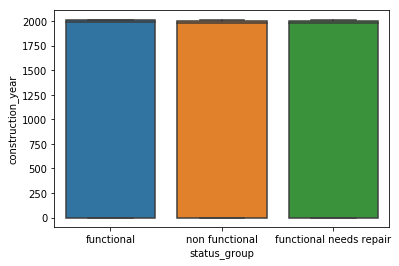

Feature Name:  extraction_type
Feature Type:  object
Sample Data:  ['gravity', 'gravity', 'gravity', 'submersible', 'gravity'] ...... ['gravity', 'gravity', 'swn 80', 'nira/tanira', 'nira/tanira']
status_group               functional  functional needs repair  non functional
extraction_type                                                               
afridev                          1200                       42             528
cemo                               45                        9              36
climax                              8                        0              24
gravity                         16048                     2701            8031
india mark ii                    1448                       79             873
india mark iii                     44                        1              53
ksb                               703                       26             686
mono                             1082                      129            1654
nira/tanira  

status_group    functional  functional needs repair  non functional
quantity_group                                                     
dry                    157                       37            6052
enough               21648                     2400            9138
insufficient          7916                     1450            5763
seasonal              2325                      416            1309
unknown                213                       14             562
Feature Name:  source
Feature Type:  object
Sample Data:  ['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'rainwater harvesting'] ...... ['spring', 'river', 'machine dbh', 'shallow well', 'shallow well']
status_group          functional  functional needs repair  non functional
source                                                                   
dam                          253                       24             379
hand dtw                     497                       17             360
lake           

In [23]:
def helper_summarize(row,target_column, target_column_type):
    '''
        Based on the two columns that we want to see a relationship, this function will determine the appropriate
        visual to use.
    '''
    print("Feature Name: ", row['name'])
    print("Feature Type: ", row['type'])
    print("Sample Data: ",row['first_five'],"......",row['last_five'])
    temp_df = t_df[[row['name'],target_column]]
    if row['type'] == "object" and target_column_type == "object": #both categorical variables
        print(get_contingency_table(temp_df))
    elif row['type'] in ["int64","float64"] and target_column_type == "object": #continous
        get_box_plot(temp_df)

def summarize_dataset(df,dependent_variable = None):
    '''
        Initial validation and calling the helper_summarize function from here to get the plots/relationships.
        In this function, we also make an assumption on the target variable if nothing is provided by the user.
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    if dependent_variable is None:
        dependent_variable = df.columns[-1]
        warning.warn("As the dependent_variable was not used, we assume that the last column of your dataframe as the dependent variable")
    df_ = describe_df(df)
    for idx,row in df_.iterrows():
        if row['name'] != dependent_variable:
            helper_summarize(row,dependent_variable,"object")
summarize_dataset(t_df,"status_group")

The above function might work well for datasets with less number of features, but it is impractical to use it for datasets with huge number of features as the output would be very long and it's difficult to grasp.

We go through the list one by one.

In [25]:
import statsmodels.formula.api as smf

In [26]:
#From https://planspace.org/20150423-forward_selection_with_statsmodels/
#Yet to modify to suit my needs

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [27]:
md = forward_selected(t_df, "status_group")

ValueError: shapes (59400,3) and (59400,3) not aligned: 3 (dim 1) != 59400 (dim 0)

In [36]:
remaining = set(t_df.columns)
remaining.remove("status_group")
selected = []
current_score, best_new_score = 0.0, 0.0
response = "status_group"

In [37]:
while remaining and current_score == best_new_score:
    scores_with_candidates = []
    for candidate in remaining:
        formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
        print(formula)
        #score = smf.ols(formula, data).fit().rsquared_adj
        #scores_with_candidates.append((score, candidate))
    #scores_with_candidates.sort()

status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
status_group ~ quantity_group + 1
status_group ~ source_class + 1
status_group ~ payment + 1
status_group ~ amount_tsh + 1
status_group ~ construction_year + 1
status_group ~ extraction_type_group + 1
status_group ~ payment_type + 1
status_group ~ longitude + 1
status_group ~ source_type + 1
status_group ~ waterpoint_type + 1
status_group ~ ward + 1
status_group ~ source + 1
status_group ~ num_private + 1
status_group ~ id + 1
status_group ~ gps_height + 1
status_group ~ population + 1
status_group ~ extraction_type_class + 1
status_group ~ management_group + 1
status_group ~ quantity + 1
status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
status_group ~ quantity_group + 1
status_group ~ source_class + 1
status_group ~ payment + 1
st

status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
status_group ~ quantity_group + 1
status_group ~ source_class + 1
status_group ~ payment + 1
status_group ~ amount_tsh + 1
status_group ~ construction_year + 1
status_group ~ extraction_type_group + 1
status_group ~ payment_type + 1
status_group ~ longitude + 1
status_group ~ source_type + 1
status_group ~ waterpoint_type + 1
status_group ~ ward + 1
status_group ~ source + 1
status_group ~ num_private + 1
status_group ~ id + 1
status_group ~ gps_height + 1
status_group ~ population + 1
status_group ~ extraction_type_class + 1
status_group ~ management_group + 1
status_group ~ quantity + 1
status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
stat

status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
status_group ~ quantity_group + 1
status_group ~ source_class + 1
status_group ~ payment + 1
status_group ~ amount_tsh + 1
status_group ~ construction_year + 1
status_group ~ extraction_type_group + 1
status_group ~ payment_type + 1
status_group ~ longitude + 1
status_group ~ source_type + 1
status_group ~ waterpoint_type + 1
status_group ~ ward + 1
status_group ~ source + 1
status_group ~ num_private + 1
status_group ~ id + 1
status_group ~ gps_height + 1
status_group ~ population + 1
status_group ~ extraction_type_class + 1
status_group ~ management_group + 1
status_group ~ quantity + 1
status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
stat

status_group ~ quantity + 1
status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
status_group ~ quantity_group + 1
status_group ~ source_class + 1
status_group ~ payment + 1
status_group ~ amount_tsh + 1
status_group ~ construction_year + 1
status_group ~ extraction_type_group + 1
status_group ~ payment_type + 1
status_group ~ longitude + 1
status_group ~ source_type + 1
status_group ~ waterpoint_type + 1
status_group ~ ward + 1
status_group ~ source + 1
status_group ~ num_private + 1
status_group ~ id + 1
status_group ~ gps_height + 1
status_group ~ population + 1
status_group ~ extraction_type_class + 1
status_group ~ management_group + 1
status_group ~ quantity + 1
status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ wa

status_group ~ quantity + 1
status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ waterpoint_type_group + 1
status_group ~ quantity_group + 1
status_group ~ source_class + 1
status_group ~ payment + 1
status_group ~ amount_tsh + 1
status_group ~ construction_year + 1
status_group ~ extraction_type_group + 1
status_group ~ payment_type + 1
status_group ~ longitude + 1
status_group ~ source_type + 1
status_group ~ waterpoint_type + 1
status_group ~ ward + 1
status_group ~ source + 1
status_group ~ num_private + 1
status_group ~ id + 1
status_group ~ gps_height + 1
status_group ~ population + 1
status_group ~ extraction_type_class + 1
status_group ~ management_group + 1
status_group ~ quantity + 1
status_group ~ management + 1
status_group ~ latitude + 1
status_group ~ water_quality + 1
status_group ~ extraction_type + 1
status_group ~ quality_group + 1
status_group ~ wa

KeyboardInterrupt: 

In [38]:
formula

'status_group ~ management_group + 1'

In [41]:
mod = smf.ols(formula,t_df).fit()

In [43]:
dir(mod)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'ms

In [45]:
mod.pvalues

ValueError: shapes (59400,3) and (59400,3) not aligned: 3 (dim 1) != 59400 (dim 0)